In [1]:
from sunpy.map import MapCubed
from sunpy.map import Map
import glob
import astropy.units as u
from sunpy.time import parse_time
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
data_dir = '/Volumes/500GB/AIA/'
str_indices = {'94':'', '131':'', '171':'', '193':'', '211':'', '304':'', '335':'', '1600':'', '1700':''}
file_list = {}
maps = {}
for key in str_indices:
    file_list.update({key: glob.glob(data_dir + '*' + key + '*.fits')})
    
these_files = file_list['94'][49:90]

maps = []

for f in these_files:
    maps.append(Map(f))

cubed = MapCubed(maps)

In [3]:
x_range = u.Quantity([-900, 0], 'arcsec')
y_range = u.Quantity([-700, 200], 'arcsec')

scubed = cubed.submap(x_range, y_range)

In [4]:
'''Uncomment to watch the movie'''
#b=tuple(scubed)
#a=Map(b,cube=True)
#%matplotlib
#a.plot()
##%matplotlib inline

'Uncomment to watch the movie'

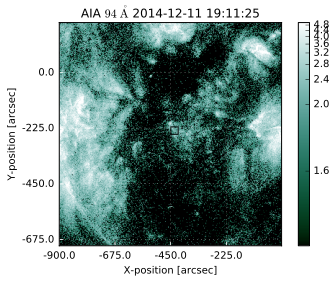

In [5]:
from matplotlib.patches import Rectangle
%matplotlib inline
scubed.std().plot(vmin=1.5,vmax=5)
ax = plt.gca()
xrect = 750
yrect = 750
ax.add_patch(Rectangle((xrect, yrect), 50, 50, fill=None))
plt.colorbar()

In [6]:
sscubed = scubed.superpixel(u.Quantity([15 * u.pixel, 15 * u.pixel]))

[ 0.  0.] pix


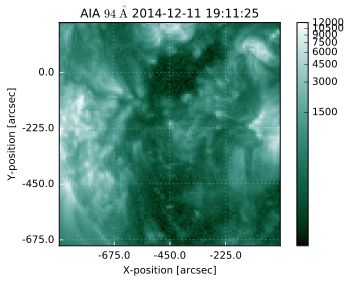

In [7]:
sscubed.plot()
plt.colorbar()

(99, 100)


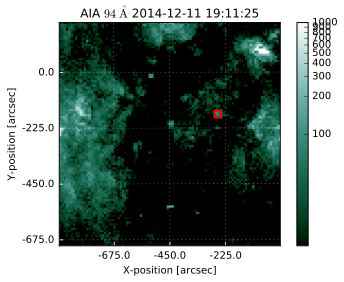

In [10]:
sscubed.std().plot(vmin=32,vmax=1000)
print(sscubed.dimensions)
ax = plt.gca()
xrect = 69
yrect = 57
ax.add_patch(Rectangle((xrect, yrect), 3, 3, fill=None,edgecolor='red',linewidth=2))
plt.colorbar()

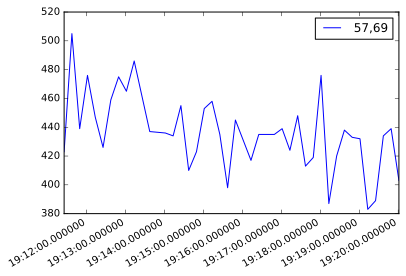

In [9]:
#sscubed.lightcurve(yrect,xrect).plot()
sscubed.lightcurve(yrect,xrect).plot()

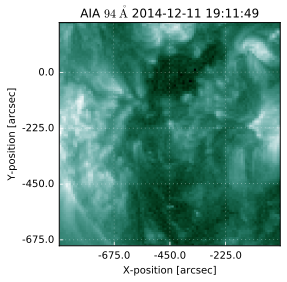

In [10]:
sscubed[0].plot()

In [11]:
sscubed[0].data.shape

(100, 99)

In [12]:
type(sscubed[0].data)

numpy.ndarray

In [25]:
s=sscubed[2].data[70:80,20:30].shape
sscubed[2].data[70:80,20:30] = np.zeros(s)

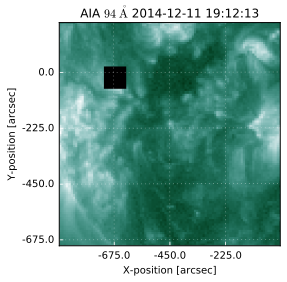

In [26]:
sscubed[2].plot()